In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
file_path = 'MoneyHeist.csv'  
df = pd.read_csv(file_path)

In [3]:
print(df)

          Date  Season  Episode                        Title  \
0   2017-05-02       1        1         Efectuar lo acordado   
1   2017-05-09       1        2         Imprudencias letales   
2   2017-05-16       1        3            Errar al disparar   
3   2017-05-23       1        4             Caballo de Troya   
4   2017-05-30       1        5         El día de la marmota   
5   2017-06-06       1        6        La cálida Guerra Fría   
6   2017-06-13       1        7    Refrigerada inestabilidad   
7   2017-06-20       1        8            Tú lo has buscado   
8   2017-06-27       1        9  El que la sigue la consigue   
9   2017-10-16       2        1     Se acabaron las máscaras   
10  2017-10-23       2        2           La cabeza del plan   
11  2017-11-02       2        3         Cuestión de eficacia   
12  2017-11-09       2        4            ¿Qué hemos hecho?   
13  2017-11-16       2        5               A contrarreloj   
14  2017-11-23       2        6         

In [5]:
# Display the first few rows of the dataset
print(df.head())

         Date  Season  Episode                 Title  \
0  2017-05-02       1        1  Efectuar lo acordado   
1  2017-05-09       1        2  Imprudencias letales   
2  2017-05-16       1        3     Errar al disparar   
3  2017-05-23       1        4      Caballo de Troya   
4  2017-05-30       1        5  El día de la marmota   

              Title(English)  \
0  Carry out what was agreed   
1        Lethal recklessness   
2              Miss shooting   
3                 Troy Horse   
4          The Groundhog Day   

                                         Description  Rate  RateNumber  
0  The Professor recruits a young female robber a...   8.3        7542  
1  Hostage negotiator Raquel makes initial contac...   8.4        6480  
2  Police grab an image of the face of one of the...   8.2        6046  
3  Raquel is adversely affected by a personal cri...   8.3        5776  
4  A sudden development in the investigation and ...   8.4        5541  


In [7]:
# Preprocess the data
# Selecting features and target variable
# Here we'll predict 'Rate' based on other features (you may choose different features)
features = df[['Season', 'Episode', 'RateNumber']]
target = df['Rate']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
 #Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

c:\Users\MADHU\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [12]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test set: {mae}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - loss: 61.9685 - mean_absolute_error: 7.8492
Mean Absolute Error on test set: 7.849240303039551


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 65.9065 - mean_absolute_error: 8.1023 - val_loss: 65.8445 - val_mean_absolute_error: 8.0851
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 64.1891 - mean_absolute_error: 7.9861 - val_loss: 64.7281 - val_mean_absolute_error: 8.0162
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 62.0758 - mean_absolute_error: 7.8563 - val_loss: 63.6297 - val_mean_absolute_error: 7.9475
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 61.9834 - mean_absolute_error: 7.8487 - val_loss: 62.5316 - val_mean_absolute_error: 7.8782
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 60.0272 - mean_absolute_error: 7.7255 - val_loss: 61.4134 - val_mean_absolute_error: 7.8071
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 60.4055 - mean_absolute_error: 7.7461 - val_loss: 60.2719 - val_mean_absolute_error: 7.7339
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 59.0255 - mean_absolute_error: 7.6566 - v

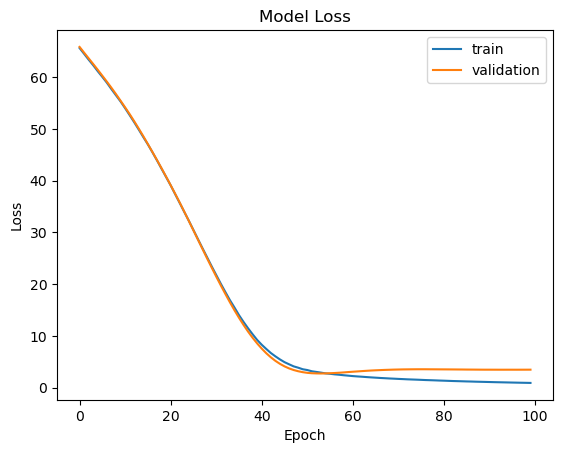

In [16]:
    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)
    
    # Plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
